In [2]:
import pandas as pd
#import  glob os glb
#from glob import glb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


In [4]:
csv_file_name = "/content/sales_train.csv"

In [5]:
df = pd.read_csv(csv_file_name)
df.head(5)
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [6]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [7]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [8]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Day
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,3
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1,5
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,6
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15


In [9]:
monthly_item_sold = df.groupby(['Year', 'Month'])['item_cnt_day'].sum().reset_index()

# Merge the result back to the original DataFrame
df = pd.merge(df, monthly_item_sold, on=['Year', 'Month'], how='left')

# Rename the new column
df.rename(columns={'item_cnt_day_x': 'item_cnt_day', 'item_cnt_day_y': 'items_sold_per_month'}, inplace=True)

# Display the updated DataFrame
print(df)

              date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154      999.00   
1       2013-01-03               0       25     2552      899.00   
2       2013-01-05               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
...            ...             ...      ...      ...         ...   
2935844 2015-10-10              33       25     7409      299.00   
2935845 2015-10-09              33       25     7460      299.00   
2935846 2015-10-14              33       25     7459      349.00   
2935847 2015-10-22              33       25     7440      299.00   
2935848 2015-10-03              33       25     7460      299.00   

         item_cnt_day  Year  Month  Day  items_sold_per_month  
0                 1.0  2013      1    2              131479.0  
1                 1.0  2013      1    3              13


Here, we are predicting permonth sales of walmart. So our target column is items_sold_per_month


In [10]:
df.nunique()

date                     1034
date_block_num             34
shop_id                    60
item_id                 21807
item_price              19993
item_cnt_day              198
Year                        3
Month                      12
Day                        31
items_sold_per_month       34
dtype: int64

In [11]:
target_column_name = "items_sold_per_month"

Here Top 10 Shops-Items Sold per Month is shown with a bar chart.

<Figure size 1200x800 with 0 Axes>

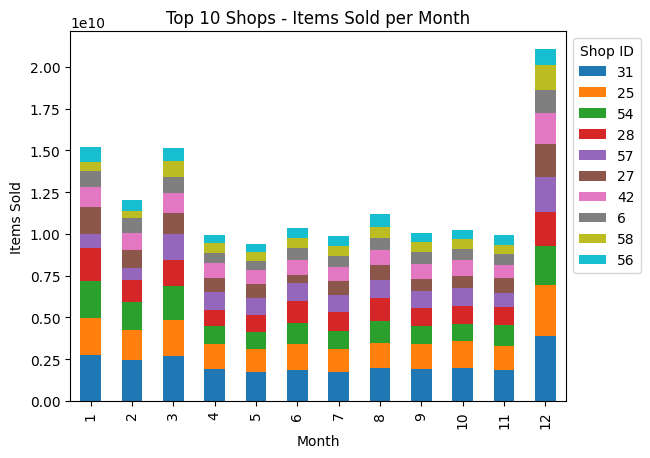

In [14]:
items_sold_per_month = df.groupby(['Month', 'shop_id'])['items_sold_per_month'].sum().unstack()

# Get the top N shops based on total items sold
top_shops = items_sold_per_month.sum().nlargest(10).index
items_sold_per_month = items_sold_per_month[top_shops]

# Plotting
plt.figure(figsize=(12, 8))
items_sold_per_month.plot(kind='bar', stacked=True)
plt.title('Top 10 Shops - Items Sold per Month')
plt.xlabel('Month')
plt.ylabel('Items Sold')
plt.legend(title='Shop ID', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
#categorical_target_column = True
categorical_target_column = False


In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 2935849
Total Number of Columns : 10


Text(0.5, 1.0, 'Total Number of Null values for Each Column')

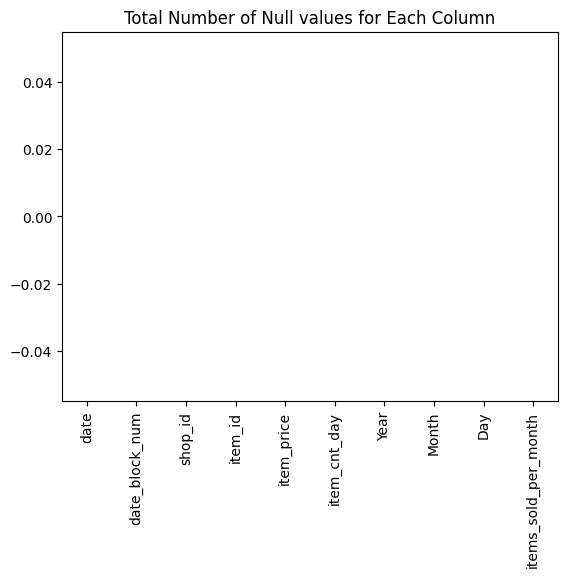

In [ ]:

df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


In [ ]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100


date                    0.0
date_block_num          0.0
shop_id                 0.0
item_id                 0.0
item_price              0.0
item_cnt_day            0.0
Year                    0.0
Month                   0.0
Day                     0.0
items_sold_per_month    0.0
dtype: float64

In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print(( df.duplicated().value_counts()/len(df) ) * 100)

False    99.999796
True      0.000204
dtype: float64


In [ ]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Day,items_sold_per_month
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2,131479.0
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,3,131479.0
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1,5,131479.0
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,6,131479.0
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15,131479.0
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,2015,10,10,71056.0
2935845,2015-10-09,33,25,7460,299.00,1.0,2015,10,9,71056.0
2935846,2015-10-14,33,25,7459,349.00,1.0,2015,10,14,71056.0
2935847,2015-10-22,33,25,7440,299.00,1.0,2015,10,22,71056.0


In [ ]:
df.drop("date",axis=1 , inplace = True)

In [ ]:
print(df.dtypes)


In [ ]:
categorical_columns = []
numeric_columns = ["date_block_nums","shop_id","item_id","item_price","item_cnt_day","Year","Month","Day","items_sold_per_month" ]


In [ ]:
df

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Day,items_sold_per_month
0,0,59,22154,999.00,1.0,2013,1,2,131479.0
1,0,25,2552,899.00,1.0,2013,1,3,131479.0
2,0,25,2552,899.00,-1.0,2013,1,5,131479.0
3,0,25,2554,1709.05,1.0,2013,1,6,131479.0
4,0,25,2555,1099.00,1.0,2013,1,15,131479.0
...,...,...,...,...,...,...,...,...,...
2935844,33,25,7409,299.00,1.0,2015,10,10,71056.0
2935845,33,25,7460,299.00,1.0,2015,10,9,71056.0
2935846,33,25,7459,349.00,1.0,2015,10,14,71056.0
2935847,33,25,7440,299.00,1.0,2015,10,22,71056.0


As the dataset has 2935849 rows so we take a small set of data from here. Here we choose 200000datas for our Linear Regression model and SVR

In [ ]:
X = df.iloc[:200000].drop(['items_sold_per_month'], axis = 1)

y = df.iloc[:200000]['items_sold_per_month']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Here the trained Linear Regression model is then used to make predictions on the test set (X_test). The predicted values are stored in the variable y_pred.

In [ ]:
# Predicting the values of the Test Set

y_pred = regressor.predict(X_test)
print(y_pred)

[128090. 131479. 128090. ... 128090. 128090. 131479.]


Here, prints the estimated coefficients and the intercept
for the linear regression model.

The coefficients and intercept collectively define the linear regression model and how it relates the independent variables to the dependent variable. Their values are optimized during the training process to minimize the difference between predicted and actual values, resulting in a model that accurately represents the relationships in the dataset. The combination of these elements contributes to the overall fit of the model to the data.

In [ ]:

# Estimated coefficients and intercept for the linear regression

print(regressor.coef_)

print(regressor.intercept_)

[-1.69450000e+03 -8.81072992e-13  8.88178420e-16  2.09970930e-14
  5.45042093e-13  0.00000000e+00 -1.69450000e+03 -2.72631310e-14]
133173.49999999997


The mean square error quantifies the average squared difference between the actual (observed) values and the predicted values produced by the model.

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


2.256649296207146e-21

Here support vercor regression is trained and mean_squared_error is  used to calculate the mean squared error, which is used to evaluate the performance of the regression model.

In [ ]:
from sklearn.svm import SVR
regr  =  SVR()
regr.fit( X_train , y_train)
y_pred =  regr.predict( X_test )
print(mean_squared_error(y_test, y_pred))

4847376.949262574
